# Visualization With Seaborn

- Seaborn is a Python data visualization library based on matplotlib.
- It provides a high-level interface for drawing attractive and informative statistical graphics and choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas DataFrames. The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

## Importing libraries and Data

### Importing Seaborn

**`seaborn`** can be installed with the help of pip, using **`!pip install seaborn`** command.

In [1]:
# installing seaborn library
!pip install seaborn

In [2]:
# importing required libraries
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

# importing required libraries
import numpy as np
import pandas as pd

# importing matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Loading and Reading dataset

In [3]:
# Read the dataset
data = pd.read_csv('datasets/bigmart_data.csv')

# drop the null values
data = data.dropna(how = 'any')

# multiply Item_Visibility by 100 to increase size
data['Visibility_Scaled'] = data['Item_Visibility'] * 100

# view the top results
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0         Dairy  249.8092            OUT049                       1999   
1   Soft Drinks   48.2692            OUT018                       2009   
2          Meat  141.6180            OUT049                       1999   
4     Household   53.8614            OUT013                       1987   
5  Baking Goods   51.4008            OUT018                       2009   

  Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0      Medium               Tier 1  Supermarket Type1          3735.1380   
1      Medium               Tier 3  Supermarket Type2           443.4228   
2      Medium               Tier 1  Supermarket Type1          2097.2700   
4        High               Tier 3  Supermarket Type1           994.7052   
5      Medium               Tier 3  Supermarket Type2           556.6088   

   Visibility_Scaled  
0           1.604730  
1           1.927822  
2           1.676007  
4           0.000000  
5           0.000000

## Creating basic plots

### Line Chart

 * With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable.
 * In seaborn, this can be accomplished by the **lineplot()** function, either directly or with **relplot()** by setting **kind="line":**

<Axes: xlabel='Item_Weight', ylabel='Item_MRP'>

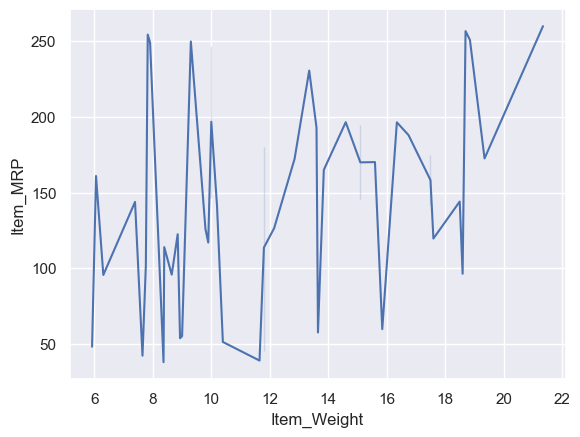

In [4]:
# line plot using sns.lineplot
sns.lineplot(x = 'Item_Weight', y = 'Item_MRP', data = data[:50])

### Bar Chart

In seaborn, you can create a barchart by simply using the **barplot** function.

<Axes: xlabel='Item_Type', ylabel='Item_MRP'>

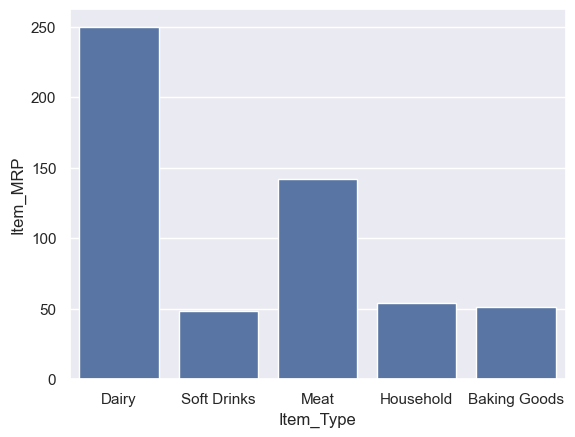

In [5]:
# Creating a barplot
sns.barplot(x = 'Item_Type', y = 'Item_MRP', data = data[:5])

### Histogram

You can create a histogram in seaborn by simply using the **distplot()**.

<Axes: xlabel='Item_MRP', ylabel='Density'>

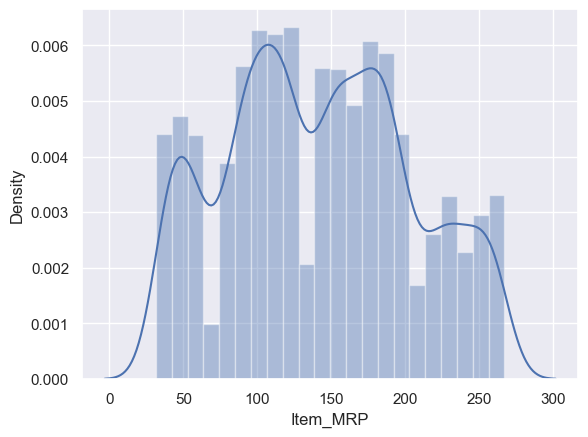

In [6]:
# Creating a histogram
sns.distplot(data['Item_MRP'])

### Box plots

You can use the **boxplot()** for creating boxplots in seaborn.

<Axes: ylabel='Item_Outlet_Sales'>

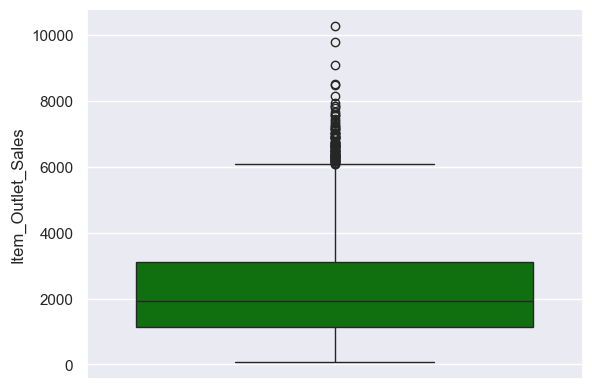

In [7]:
# Creating a box plot
sns.boxplot(data['Item_Outlet_Sales'], orient = 'vertical', color = 'green')

### Violin plot

- A violin plot plays a similar role as a box and whisker plot. 
- It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. You can create a violinplot using the **violinplot()** in seaborn.

<Axes: ylabel='Item_Outlet_Sales'>

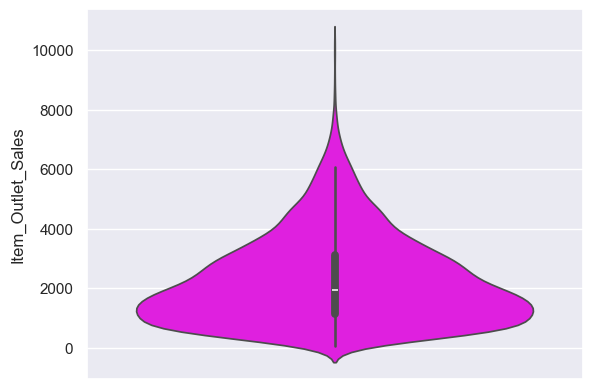

In [8]:
# Creating a violin plot
sns.violinplot(data['Item_Outlet_Sales'], orient='horizontal', color = 'magenta')

### Scatter plot

- It depicts the distribution of two variables using a cloud of points, where each point represents an observation in the dataset. 
- You can use **relplot()** with the option of **`kind=scatter`** to plot a scatter plot in seaborn.

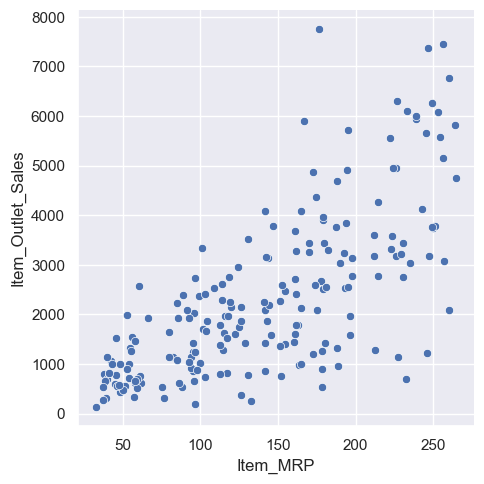

In [9]:
# Creating a scatter plot
sns.relplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = data[:200], kind = 'scatter')

#### Hue semantic

We can also add another dimension to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a **“hue semantic”**.

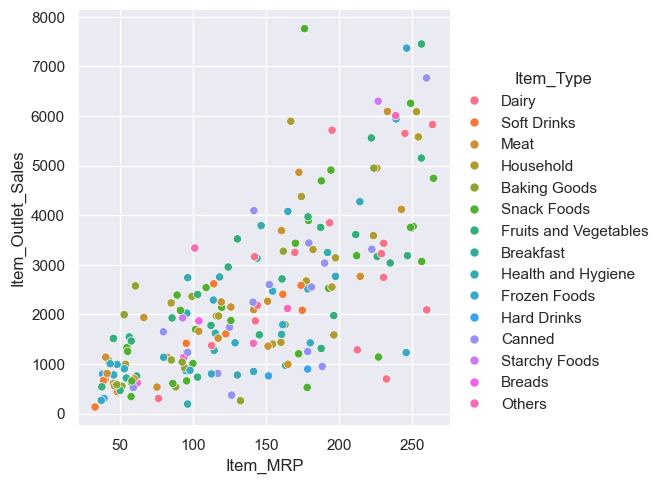

In [10]:
sns.relplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Item_Type', data = data[:200])

- When we use **hue** semantic, we can create more complex line plots in seaborn. 
- In the following example, **different line plots for different categories of the Outlet_Size** are made.

<Axes: xlabel='Item_Weight', ylabel='Item_MRP'>

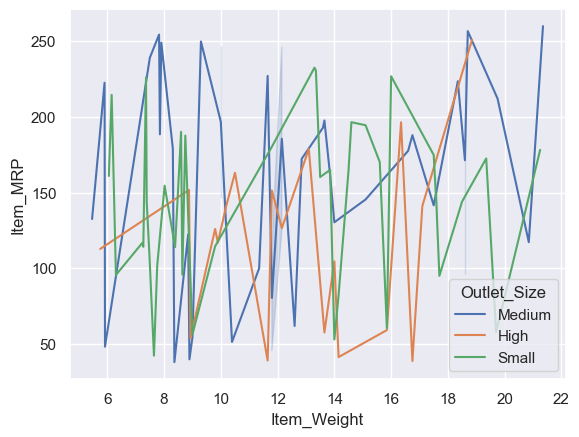

In [11]:
# different line plots for different categories of the Outlet_Size
sns.lineplot(x = 'Item_Weight', y = 'Item_MRP', hue = 'Outlet_Size', data = data[:100])

### Bubble plot

We utilize the **hue** semantic to color bubbles and at the same time use it as size of individual bubbles.

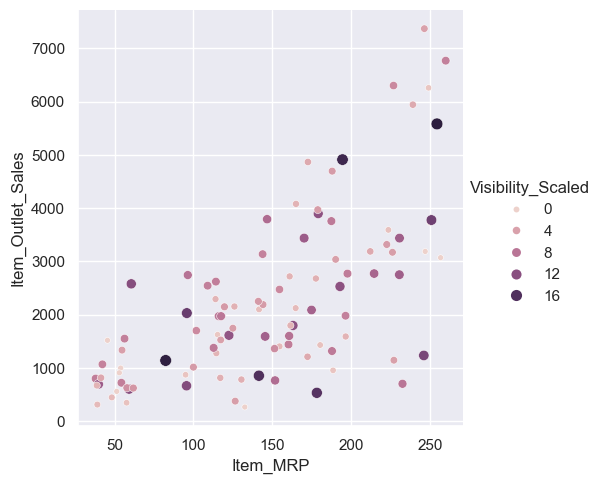

In [12]:
# bubble plot
sns.relplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = data[:100], kind='scatter', size = 'Visibility_Scaled', hue = 'Visibility_Scaled')

### Category wise sub plot

You can also create **plots based on category** in seaborn.

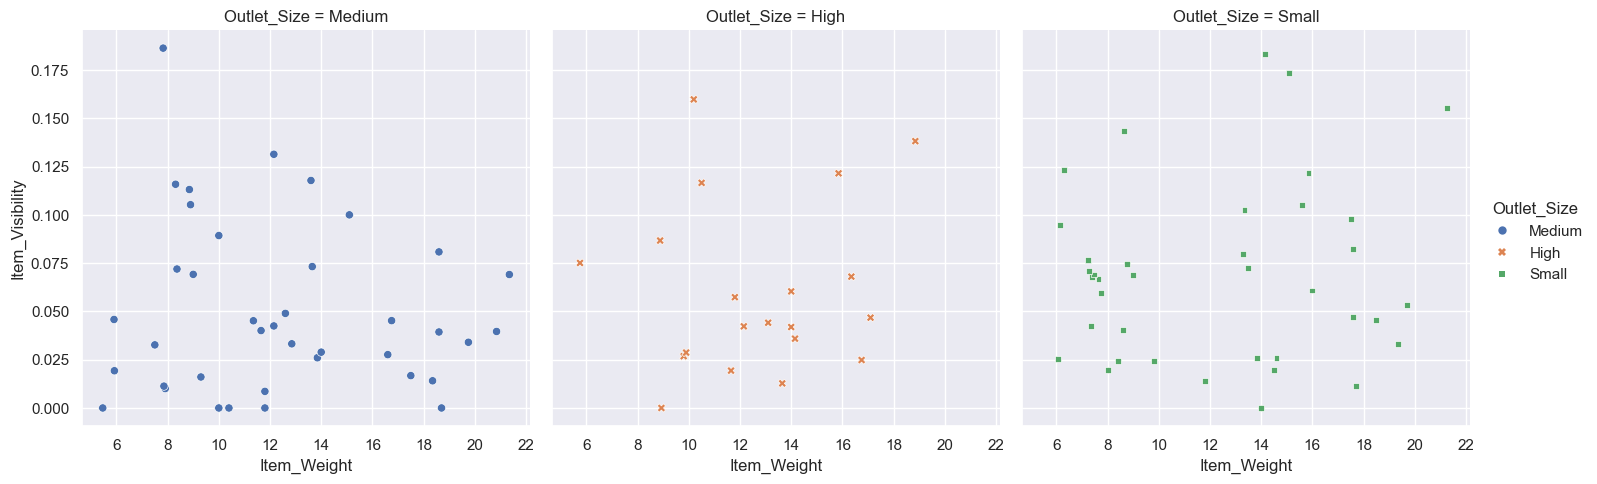

In [13]:
# subplots for each of the category of Outlet_Size
sns.relplot(x = 'Item_Weight', y = 'Item_Visibility', hue = 'Outlet_Size', style = 'Outlet_Size',col = 'Outlet_Size', data = data[:100])

## Advanced categorical plots in seaborn

For categorical variables we have three different families in seaborn:
- **Categorical scatterplots:** stripplot() and swarmplot()
- **Categorical distribution plots:** boxplot(), violinplot(), boxenplot()
- **Categorical estimate plots:** pointplot(), barplot()

**The default representation of the data in catplot() uses a scatterplot.**

### Categorical scatterplots

#### Strip plot:
- Draws a scatterplot where one variable is categorical.
- You can create this by passing **kind=strip** in the `catplot()`.

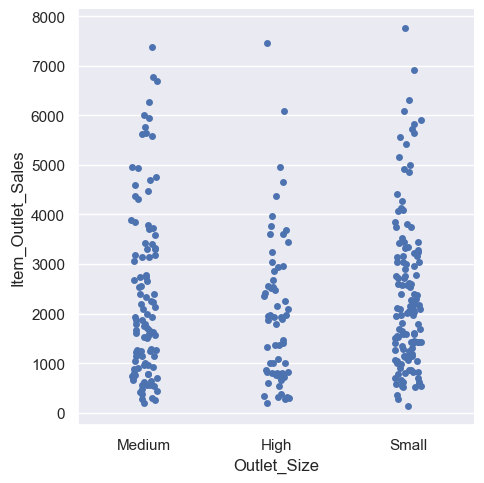

In [15]:
# Creating a strip plot
sns.catplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', kind='strip', data = data[:300])

#### Swarm plot
- This function is similar to `stripplot()`, but the points are adjusted so that they don’t overlap. This gives a better representation of the distribution of values, but it does not scale well to large numbers of observations. This style of plot is sometimes called a “beeswarm”.
- You can create this by passing **kind=swarm** in the `catplot()`

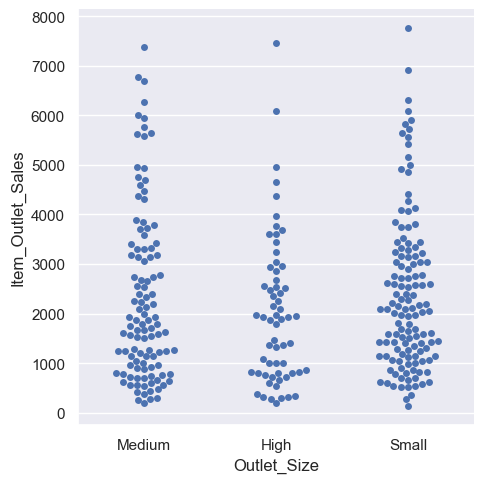

In [17]:
# Creating a swarm plot
sns.catplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', kind = 'swarm', data = data[:300])

### Categorical distribution plots

#### Box Plots

Box plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.
 

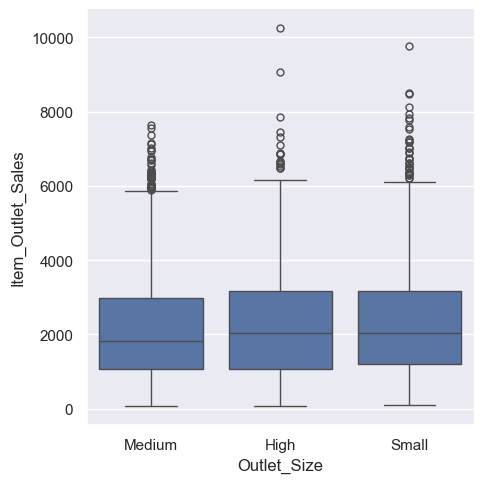

In [18]:
# Creating a box plot
sns.catplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', kind = 'box', data = data)

#### Violin Plots

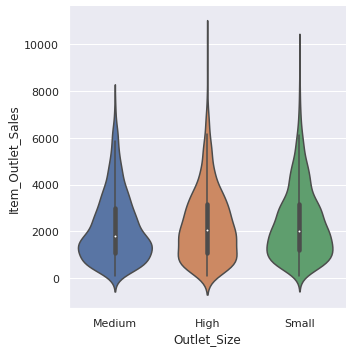

In [17]:
# Creating a violin plot
sns.catplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', kind = 'violin', data = data)

#### Boxen plots

- This style of plot was originally named a “letter value” plot because it shows a large number of quantiles that are defined as “letter values”.
- It is similar to a box plot in plotting a nonparametric representation of a distribution in which all features correspond to actual observations. 
- By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails. 

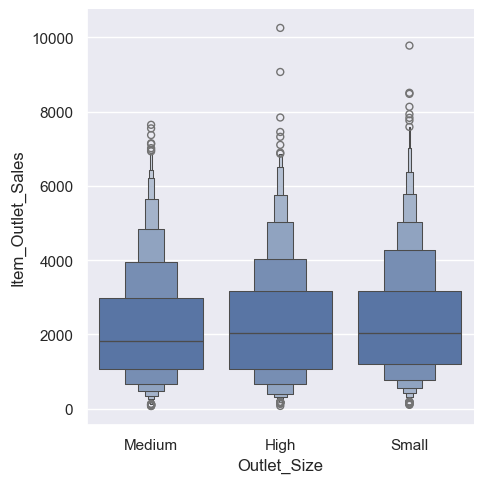

In [19]:
# Creating a boxen plot
sns.catplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', kind = 'boxen', data = data)

#### Point plot

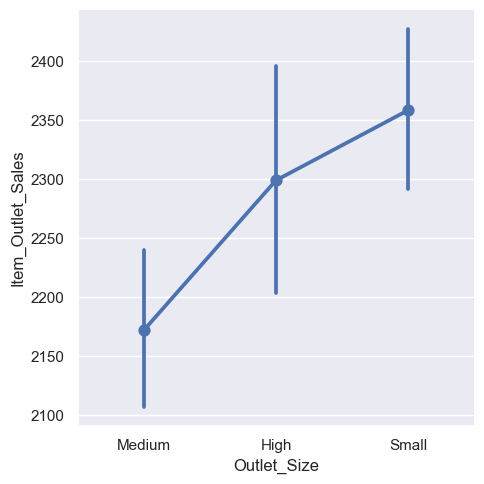

In [20]:
# Creating a point plot
sns.catplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', kind = 'point', data = data)

#### Bar plots

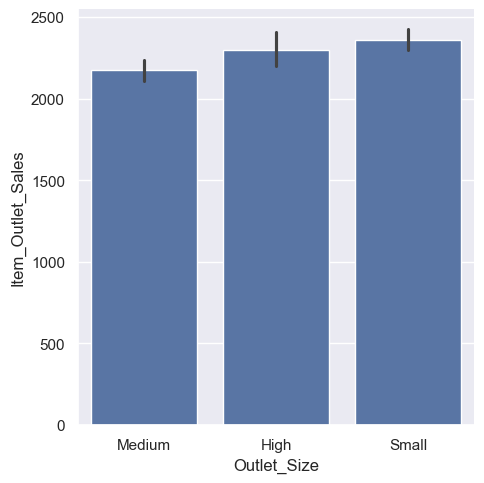

In [21]:
# Creating a bar plot
sns.catplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', kind = 'bar', data = data)

## Density Plots in seaborn

### KDE plot

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation by **`sns.kdeplot`**.

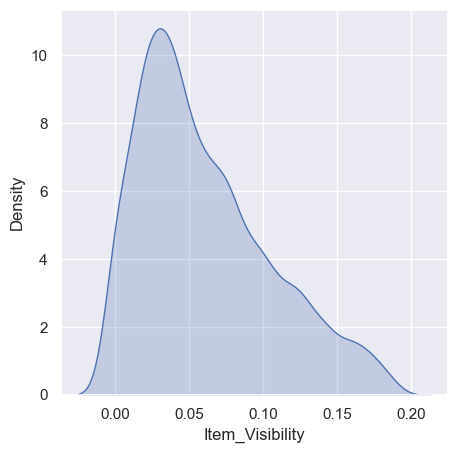

In [26]:
# Distribution of Item Visibility
plt.figure(figsize=(5,5))
sns.kdeplot(data['Item_Visibility'], shade=True)

<Axes: xlabel='Item_MRP', ylabel='Density'>

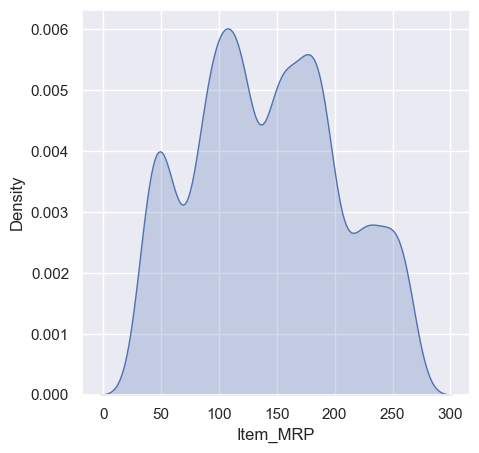

In [27]:
# distribution of Item MRP
plt.figure(figsize=(5,5))
sns.kdeplot(data['Item_MRP'], shade=True)

### Histogram and Density Plot

Histograms and KDE can be combined using distplot.

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

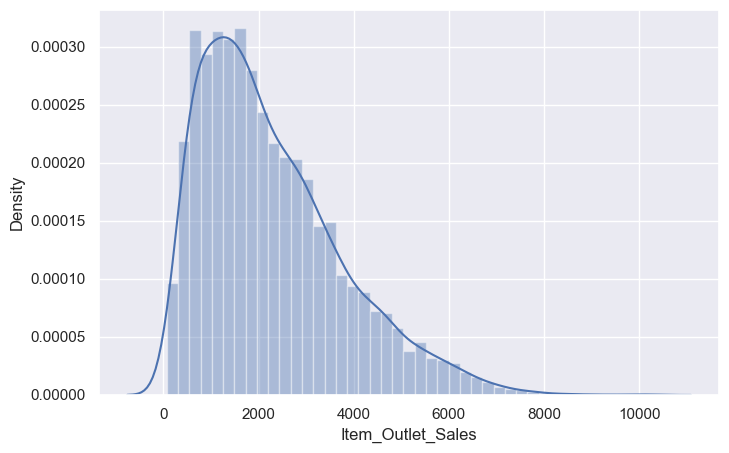

In [31]:
plt.figure(figsize=(8, 5))
sns.distplot(data['Item_Outlet_Sales'])

## Pair plots

- When you generalize joint plots to datasets of larger dimensions, you end up with pair plots.
- This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.
- Visualizing the multidimensional relationships among the attributes is as easy as calling **`sns.pairplot`**.

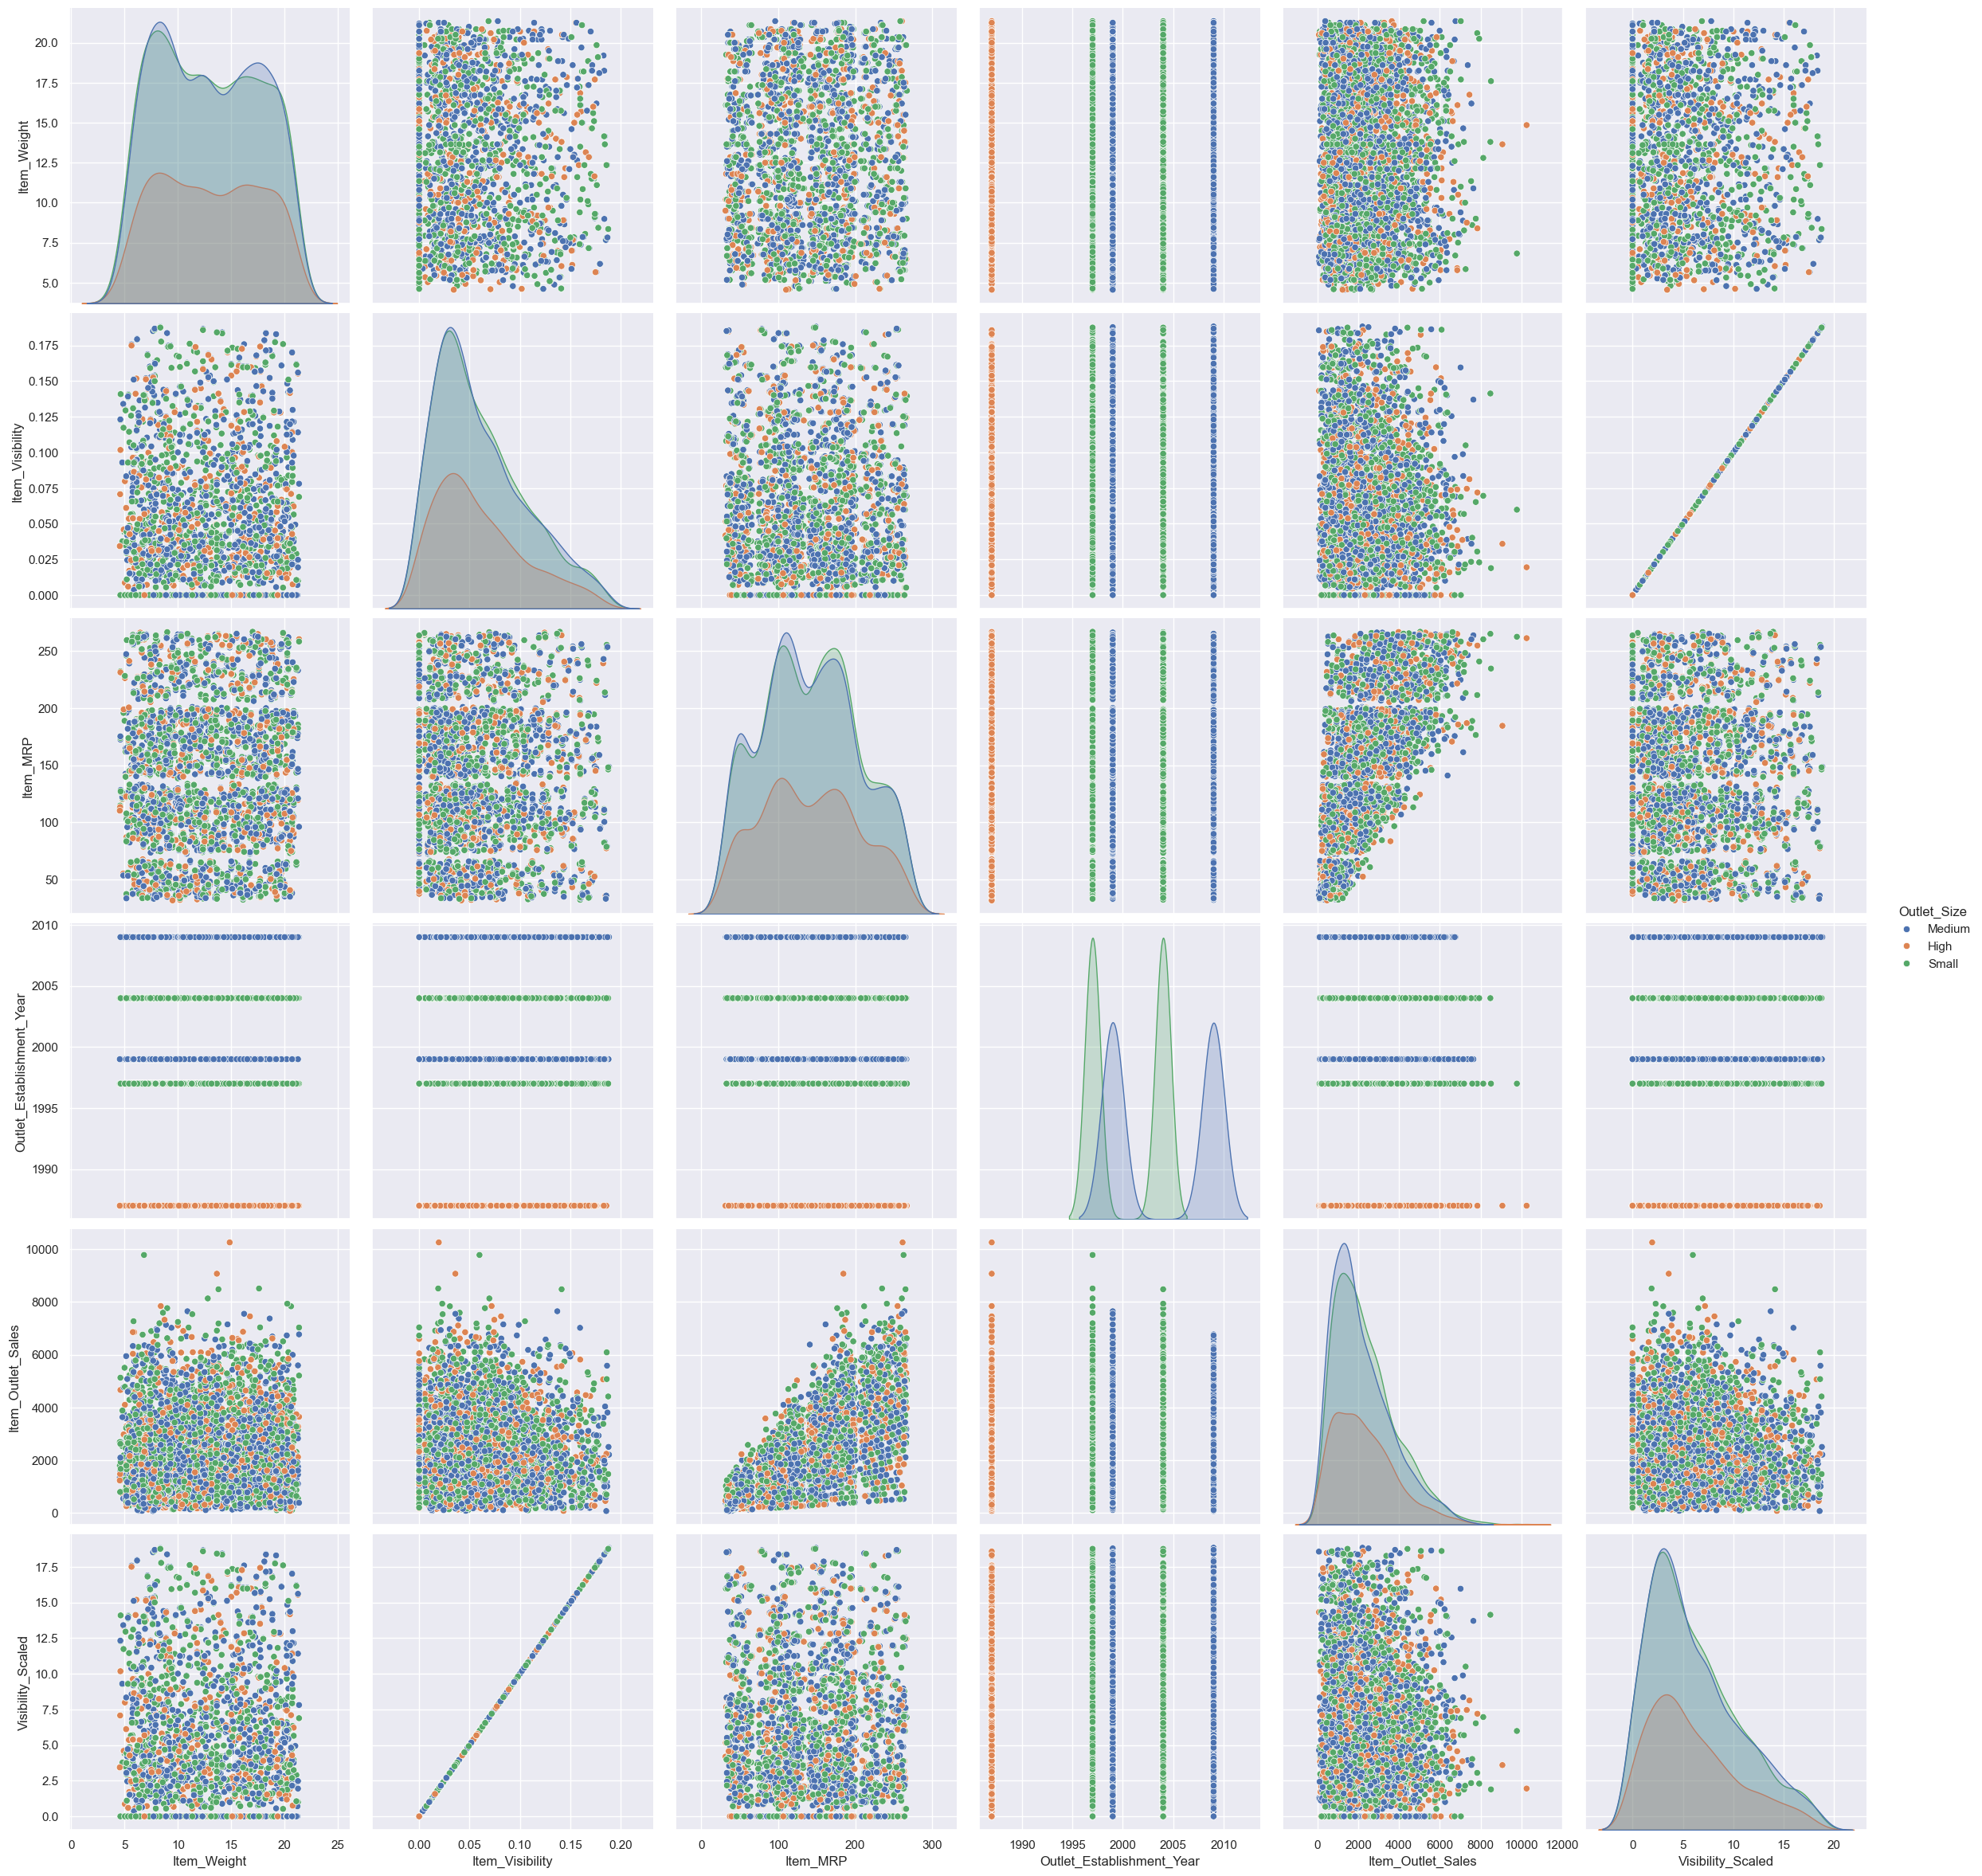

In [33]:
# Creating a pairplot
sns.pairplot(data, hue='Outlet_Size', height = 4)